In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

# Άσκηση 1
Μέθοδος Runge - Kutta 2ης τάξης


In [6]:
def yy(x,y):
    yy = (-10)*(y**2)/x
    return yy
yo = 1
xo = 0.1

In [7]:
def y(x):
    a = 10*np.log(x)+24.02585
    y = 1/a
    return y


def RK(h):
    yn = 1
    xn = 0.1
   
    X = [xn]
    Y = [yn]
    er = [abs(yn-y(1.1))]
    xf = 1.1
    while abs(xn-xf)>abs(h/2):
        
        k1 = h*yy(xn,yn)
        k2 = h*yy(xn+(h),yn+(k1))
        yn = yn +((1/2)*(k1+k2))
        xn = xn + h
        er.append(abs(yn-y(1.1)))
        X.append(xn)
        Y.append(yn)
    plot1 = plt.plot(X,er,  color ='green', marker = 'o')
    plt.grid(True)
   
    print("The solution for h =", h, "is", yn)
    return plot1

In [8]:
y(1.1)

0.040033705500738266

The solution for h = 0.01 is 0.04014759905153011


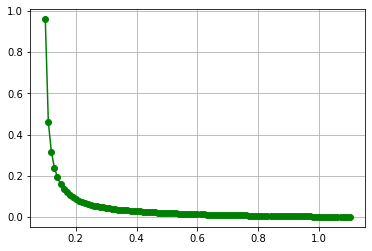

In [9]:
plot1 = RK(0.01)

The solution for h = 0.015 is 0.029305505370344057


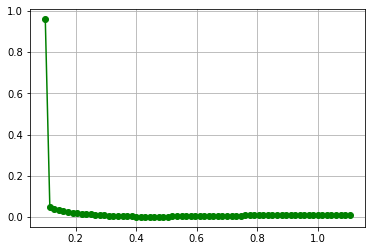

In [10]:
plot2 = RK(0.015)

In [11]:
plot3 = RK(0.02)

OverflowError: (34, 'Result too large')

The solution for h = 0.001 is 0.04003947333825838


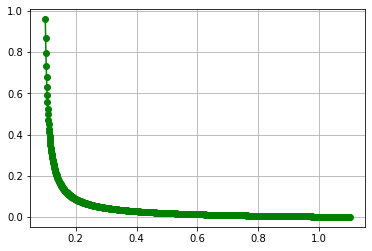

In [12]:
plot4 = RK(0.001)

# Άσκηση 2
Πρόβλημα Συνοριακών Τιμών

In [13]:
def trial1(x,y):
    yy = np.exp(2*x)-np.exp((-4)*x)
    return yy

In [14]:
def y2(x):
    y = 1.156518*np.exp(2*x)-0.156517*np.exp((-4)*x)
    return y
def z(z,y):
    return -2*z+8*y

#We need to apply the method into a two dimensional system of y & z

def RK2(h,xn,yn,zn):
    
    
    Z = [zn]
    Y = [yn]
    er = [abs(yn-y2(1))]
    xf = 1
    
    while abs(xn-xf)>abs(h/2):
        
        k1 = h*zn
        l1 = h* z(zn,yn)
        
        k2 = h*(zn+l1)
        l2 = h*z(zn+l1,yn+k1)
        
        yn = yn +((1/2)*(k1+k2))
        zn = zn + ((1/2)*(l1+l2))
        
        xn = xn + h
        
        er.append(abs(yn-y(1.1)))
        
        Z.append(zn)
        Y.append(yn)
    
   

    return yn

In [15]:
yn = RK2(0.01,0,1,3)
print("The solution for h =", 0.01, "is", yn)

The solution for h = 0.01 is 8.616377253922469


In [16]:
yn = RK2(0.01, 0, 1, 2.9)
print("The solution for h =", 0.01, "is", yn)

The solution for h = 0.01 is 8.493548090039452


Παρατηρουμε ότι δεν πετυχαίνουμε την ρίζα κατά πολύ

Ας φτιάξουμε έναν αλγόριθμο που θα αξιοποιεί το παραπάνω και θα χρησιμοποιεί τη γραμμική παρεμβολή για να επιλέξει τις κατάλληλες τιμές v

In [41]:
def lp(x0,u0,u1,v0,h):
    #let's see now
    #v0 is the initial assumption for the value of z=y'
    #let's run runge kutta once for this
    
    yn = RK2(h,x0,u0,v0)
    ub1 = yn
    t = u1 - yn
    v1 = v0
    
    if t>0:
        #this means we hit lower than our target
        
        v0 = v0+1
    if t<0:
        #this means we hit higher than our target
        
        v0 = v0 - 1
        
    yn = RK2(h,x0,u0,v0)
    ub2 = yn
    t = u1 - yn
   
    v2 = v0
    a = ub2/(ub2-ub1)
    #let's seek a solution with a maximum error of 1
    
    while abs(t)>=1:
        
        v0 = v2 - a*(v2-v1)
        
        yn = RK2(h,x0,u0,v0)
        
        t = u1 - yn
        
        if t<0:
            #the new solution hit higher then the value
            #we need to decrease our upper limit
            v2 = v0
            if ub2>ub1:
                ub2 = yn
            else:
                ub1 = yn
        if t>0 :
            #the new solution is lower than the real value
            #we need to increase our lower limit
            v1 = v0
            
            if ub2>ub1:
                ub1 = yn
            else:
                ub2 = yn
    
    return yn
    

In the end we get a result of

In [42]:
print(lp(0,1,0,3,0.01))

5.2284565565940966e-15


ok so the algorithm didn't work (probably it's just because it's taking too long)

let's try doing the calculations manually

In [22]:
v1 = 3
v2 = -5

u1 = RK2(0.01,0,1,v1)
u2 = RK2(0.01,0,1,v2)
print("We get", u1, "for v0=",v1," and", u2, "for v0 = ", v2)

We get 8.616377253922469 for v0= 3  and -1.2099558567189952 for v0 =  -5


ok so now we have 2 values, one on one side of the real value for u and one on the other

In [44]:
v3 = v2-(u2/(u2-u1))*(v2-v1)
print(v3)

-4.014927873423164


In [47]:
print("For our new v which is", v3, "we get y(1)=", RK2(0.01,0,1,v3))

For our new v which is -4.014927873423164 we get y(1)= -7.348722325106749e-16
